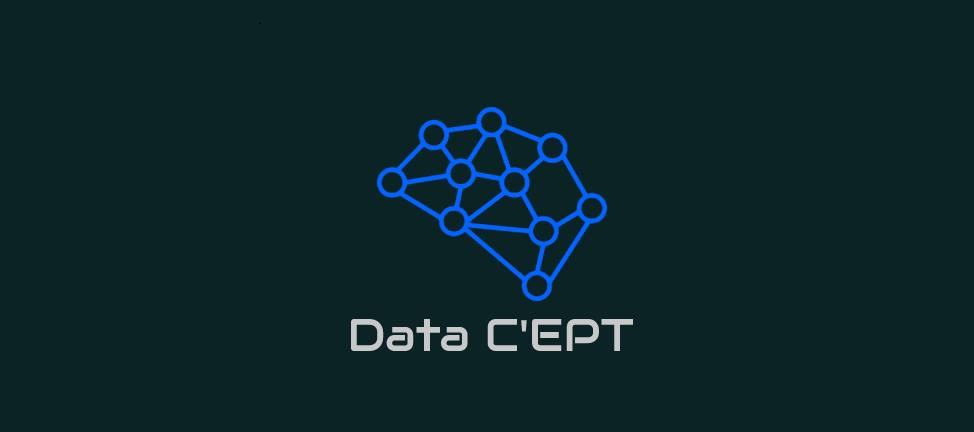<center>

**DATA C'EPT 2020 - 2021**

<center>

**Pandas & Matplotlib & Seaborn**


**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

In [1]:
import numpy as np
import pandas as pd

## DataFrames


The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type.

First, we'll load a simple dataset (forestfire.csv)

- The Dataset features :
1. make : 
2. fuel-type
3. aspiration
4. drive-wheels
5. length
6. width
7. height
8. num-of-cylinders
9. engine-size
10. horsepower
11. peak-rpm
12. price

In [2]:
df = pd.read_csv("/content/automobile.csv")
df #df.head() / df.tail()

,make,fuel-type,aspiration,drive-wheels,length,width,height,num-of-cylinders,engine-size,horsepower,peak-rpm,price
0,alfa-romero,gas,std,rwd,168.8,64.1,48.8,four,130,111.0,5000,13495
1,alfa-romero,gas,std,rwd,168.8,64.1,48.8,four,130,111.0,5000,16500
2,alfa-romero,gas,std,rwd,171.2,65.5,52.4,six,152,154.0,5000,16500
3,audi,gas,std,fwd,176.6,66.2,54.3,four,109,102.0,5500,13950
4,audi,gas,std,4wd,176.6,66.4,54.3,five,136,115.0,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...
81,mitsubishi,gas,turbo,fwd,173.2,66.3,50.2,four,156,145.0,5000,14489
82,mitsubishi,gas,std,fwd,172.4,65.4,51.6,four,122,88.0,5000,6989
83,mitsubishi,gas,std,fwd,172.4,65.4,51.6,four,122,88.0,5000,8189
84,mitsubishi,gas,turbo,fwd,172.4,65.4,51.6,four,110,116.0,5500,9279


Let’s have a look at data dimensionality, feature names, and feature types.

In [3]:
print(df.shape)

(86, 12)


Now let's try printing out column names using `columns`:

In [4]:
print(df.columns)

Index(['make', 'fuel-type', 'aspiration', 'drive-wheels', 'length', 'width',
       'height', 'num-of-cylinders', 'engine-size', 'horsepower', 'peak-rpm',
       'price'],
      dtype='object')


We can use the `info()` method to output some general information about the dataframe: 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              86 non-null     object 
 1   fuel-type         86 non-null     object 
 2   aspiration        86 non-null     object 
 3   drive-wheels      86 non-null     object 
 4   length            84 non-null     float64
 5   width             86 non-null     float64
 6   height            85 non-null     float64
 7   num-of-cylinders  86 non-null     object 
 8   engine-size       86 non-null     int64  
 9   horsepower        84 non-null     float64
 10  peak-rpm          86 non-null     int64  
 11  price             86 non-null     int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 8.2+ KB
None


We can **change the column type** with the `astype` method. Let's apply this method to the `Area` feature to convert it into `int64`:

In [6]:
df['width'].astype('int64')

0     64
1     64
2     65
3     66
4     66
      ..
81    66
82    65
83    65
84    65
85    65
Name: width, Length: 86, dtype: int64

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [7]:
df.describe()

,length,width,height,engine-size,horsepower,peak-rpm,price
count,84.000000,86.000000,85.000000,86.000000,84.000000,86.000000,86.000000
mean,173.011905,66.013953,52.996471,131.395349,106.273810,5212.790698,14725.918605
std,14.269408,2.579976,2.496447,54.584048,39.408993,497.829763,10035.541607
min,144.600000,60.300000,47.800000,61.000000,48.000000,4200.000000,5151.000000
25%,159.100000,64.125000,50.800000,92.000000,76.000000,4850.000000,7295.000000
50%,173.000000,65.400000,53.300000,115.000000,101.000000,5250.000000,10695.000000
75%,177.800000,66.500000,54.400000,149.000000,123.000000,5500.000000,17645.000000
max,208.100000,72.000000,59.800000,326.000000,262.000000,6000.000000,45400.000000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [8]:
df.describe(include=['object'])

,make,fuel-type,aspiration,drive-wheels,num-of-cylinders
count,86,86,86,86,86
unique,12,2,2,3,7
top,mazda,gas,std,fwd,four
freq,17,80,71,54,58


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let's have a look at the distribution of `Churn`:

In [9]:
df['make'].value_counts()

mazda            17
honda            13
mitsubishi       13
dodge             9
mercedes-benz     8
bmw               8
audi              6
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [ ]:
df['make'].value_counts(normalize=True)*100


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *price* (use `ascending=False` to sort in descending order):


In [ ]:
df.sort_values(by='price', ascending=False).head()

We can also sort by multiple columns:

In [ ]:
df.sort_values(by=['price', 'horsepower'],
        ascending=[True, False]).head()

### Indexing and retrieving data

A DataFrame can be indexed in a few different ways. 

To get a single column, you can use a `DataFrame['feature']` construction.

In [ ]:
df['price'] 
#df['price'].mean()

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `feature` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column.

In [ ]:
affordable = df[df['price'] <= 10000]
affordable 
#affordable.mean()

**AND** / **OR** operators

In [ ]:
df[(df['price'] <= 10000) & ((df['num-of-cylinders'] == 'four') | (df['num-of-cylinders'] == 'three'))].horsepower.min()

What are the cars that have the best rpm-peak and have at most 3 cylindres and its price is less than the average price of all cars ? 

In [ ]:
df2 = df[((df['num-of-cylinders']=='one') | (df['num-of-cylinders']=='two') | (df['num-of-cylinders']=='three'))
    & (df.price<=df.price.mean())]
df2[df2['peak-rpm'] == df2['peak-rpm'].max()]

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.
Since our dataset is not indexed by names we'll make it so. we'll use the `set_index` method to change the index to the `make` feature.

**Note** that we can use multiple indexing.

In [ ]:
df3 = df.set_index('make')
#df3 = df.set_index(['make','fuel-type'])
df3.head()

In [ ]:
df3.loc['audi']

In [ ]:
df3.iloc[2]

If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [ ]:
df[-1:]


### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [ ]:
df.apply(np.max) 

The `apply` method can also be used to apply a function to each row. To do this, specify `axis=1`. 
Lambda functions are very convenient in such scenarios. For example, if we need to select all cars make starting with m, we can do it like this:

In [ ]:
df[df['make'].apply(lambda make: make[0] == 'm')].head()

In [ ]:
df['price'].apply(lambda p: np.log(p))

The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [ ]:
print(df['num-of-cylinders'].unique())
d = {'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5, 'six' : 6 , 'eight' : 8, 'twelve' : 12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(d)
df.head()


### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [ ]:
columns_to_show = ['horsepower','peak-rpm','price']
df.groupby(by='make')[columns_to_show].describe()

Let’s do the same thing, but slightly differently by passing a list of functions to `agg()`:

In [ ]:
columns_to_show = ['horsepower','peak-rpm','price']


df.groupby(['make'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables. To do so, we can build a **contingency table** using the `crosstab` method:



In [ ]:
pd.crosstab(df['make'], df['num-of-cylinders'])

In [ ]:
pd.crosstab(df['make'], df['num-of-cylinders'], normalize=True)

Pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.


In [ ]:
df.pivot_table(['num-of-cylinders', 'horsepower'],
               ['aspiration'], aggfunc='mean')


### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let's create the `total_calls` Series and paste it into the DataFrame:



In [ ]:
volume = df['length'] * df['width'] * df['height']
df.insert(loc=7, column='volume', value=volume) 
# loc parameter is the number of columns after which to insert the Series object
df.head()

It is possible to add a column more easily without creating an intermediate Series instance:

In [ ]:
df['hp per cylinder'] = df['horsepower'] / df['num-of-cylinders']
df.head()

To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [ ]:
# get rid of just created columns
df.drop(['aspiration', 'drive-wheels'], axis=1, inplace=True) 
# and here’s how you can delete rows
df.drop([1, 2]).head() 

**Data Visualisation**

##Matplotlib


In [35]:
import matplotlib.pyplot as plt

The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space.

In [ ]:
plt.scatter(df['horsepower'],df['price'],marker='x')

An easy way to take a look at the distribution of a numerical variable is to plot its histogram using the matplotlib's method `hist`.

In [ ]:
plt.hist(df['price'],bins=100)

##Seaborn

In [38]:
import seaborn as sns

Another way to vizualize the distribution of a numerical variable is to use Seaborn's method `distplot`

In [ ]:
sns.distplot(df['horsepower'])

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the seaborn's function `countplot`.

In [ ]:
f=sns.countplot(data=df,y='make')
#f.set_xticklabels(f.get_xticklabels(),rotation=90)

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (min, first quartile (Q1), median, third quartile (Q3),max).
To do so we use the `boxplot` method.

In [ ]:
sns.boxplot(data=df, y="price", x='num-of-cylinders')

The `regplot` method is used to plot data and a linear regression model fit.


In [ ]:
sns.regplot(data=df, x="horsepower",y="price")

In [ ]:
sns.regplot(df['horsepower'],np.log(df['price']))

To represent the correlation matrix in more visible way, it's better to use the `heatmap` method.

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.heatmap(df.isna())

We can scatter all the features in the dataset pairwise in the same figure just by using the `pairplot` method.

In [ ]:
sns.pairplot(df)